In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")


Python Platform: macOS-12.3-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.9 (main, Jan 11 2023, 09:18:18) [Clang 14.0.6 ]
Pandas 2.0.0
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [ ]:
import yfinance as yf
# Define the stock symbol and time range
stock_symbol = 'MSFT'
start_date = '2010-01-01'
end_date = '2023-04-12'

# use download function to read the data, read it into a Pandas DataFrame
msft_data = yf.download(stock_symbol, start=start_date, end=end_date)
help(yf.download)
# Save the data to a CSV file
msft_data.to_csv('msft_stock_data.csv')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('msft_stock_data.csv')

In [3]:
# Extract the closing price column
closing_prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Create sequences for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

# Reshape the input for the LSTM model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [5]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


Metal device set to: Apple M1 Pro


In [6]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50


2023-04-13 11:20:02.147856: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


31/31 [==============================] - 3s 41ms/step - loss: 0.0158
Epoch 2/50
31/31 [==============================] - 1s 30ms/step - loss: 6.0722e-04
Epoch 3/50
31/31 [==============================] - 1s 29ms/step - loss: 3.2062e-04
Epoch 4/50
31/31 [==============================] - 1s 30ms/step - loss: 2.8529e-04
Epoch 5/50
31/31 [==============================] - 1s 29ms/step - loss: 3.0023e-04
Epoch 6/50
31/31 [==============================] - 1s 30ms/step - loss: 2.8689e-04
Epoch 7/50
31/31 [==============================] - 1s 29ms/step - loss: 2.7056e-04
Epoch 8/50
31/31 [==============================] - 1s 28ms/step - loss: 2.7220e-04
Epoch 9/50
31/31 [==============================] - 1s 28ms/step - loss: 2.7930e-04
Epoch 10/50
31/31 [==============================] - 1s 28ms/step - loss: 2.7413e-04
Epoch 11/50
31/31 [==============================] - 1s 29ms/step - loss: 2.7452e-04
Epoch 12/50
31/31 [==============================] - 1s 28ms/step - loss: 2.9310e-04
Epoc

41/41 [==============================] - 1s 15ms/step


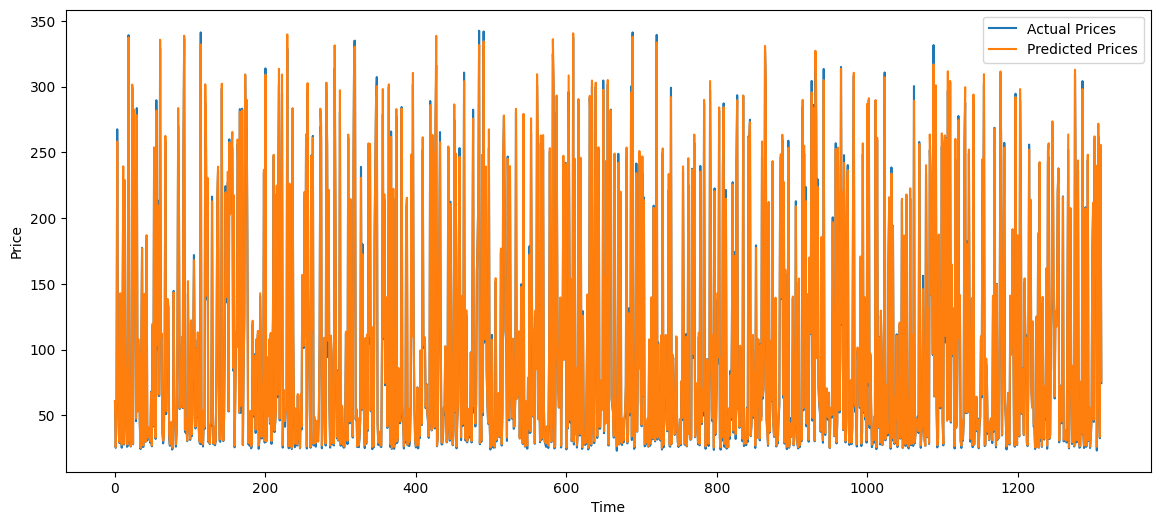

In [10]:
# Predict the stock prices using the test data
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# # Rescale the test data
# y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
# Inverse transform the predictions and test data to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
# Visualize the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
y_test_rescaled

array([[ 60.63999939],
       [ 25.21999931],
       [ 45.34999847],
       ...,
       [ 32.52000046],
       [253.69999695],
       [ 74.48999786]])

In [31]:
X_test_rescaled

NameError: name 'X_test_rescaled' is not defined

In [18]:
X_test

array([], dtype=float64)